In [22]:
import os, sys, time, copy
sys.path.append(os.getcwd())

import matplotlib.pyplot as plt
import seaborn as sns

from src.utils.json_handling import get_sorted_dict
from analysis.utils import find_best, smoothen_runs, load_different_runs
from src.utils.formatting import create_folder
from analysis.colors import agent_colors
import pandas as pd

In [29]:
# agent_returns['advantage_actor_critic']

array([ 19.236 ,  19.148 ,  20.4035,  16.3085,  17.618 ,  18.5085,
        16.7075,  19.789 ,  16.676 ,  18.379 ,  18.956 ,  20.1145,
        16.7385,  18.1225,  18.508 ,  20.1065,  20.196 ,  18.4775,
        18.119 ,  18.869 ,  21.262 ,  18.773 ,  18.8055,  19.2015,
        21.7735,  21.617 ,  21.2275,  20.1945,  18.435 ,  20.604 ,
        21.0175,  21.3035,  21.3185,  37.7645,  35.738 ,  39.    ,
        22.2505,  19.3685,  21.5735,  34.1755,  42.341 ,  33.932 ,
        63.258 ,  83.017 ,  69.9235,  12.0475,  11.8925,  15.3505,
        12.4655,  14.3385,  13.52  ,  26.614 ,  35.267 ,  31.4795,
        14.118 ,  14.2985,  17.4135,  33.772 ,  33.9465,  32.717 ,
        57.2565,  61.0925,  87.4765,  18.8435,  17.627 ,  21.149 ,
        73.978 ,  77.887 ,  52.2915,  80.39  , 111.2865,  55.906 ,
        31.473 ,  28.32  ,  33.209 , 127.4925, 104.1225, 106.469 ,
       135.8845, 155.141 , 136.373 ,  66.2185,  56.815 ,  68.155 ,
       147.8385, 154.76  , 153.7915, 170.747 , 173.5435, 171.0

In [23]:
json_files = ['./experiments/project-sweep/cartpole/nn/a2c.json']
    # ,'./experiments/project/cartpole/nn/sarsa.json' ,'./experiments/project/cartpole/nn/ac.json'] # all the json files

json_handles = [get_sorted_dict(j) for j in json_files]

In [ ]:
agent_returns = {}
agent_return_list = []
for en, js in enumerate(json_handles):
    agent = js['agent']
    returns  = load_different_runs(js).mean(axis = 1)
    agent_returns[agent] = returns
    for r in returns:
        agent_return_list.append((agent, r))
all_agents = agent_returns.keys()
# axs.set_ylim([0, 120])
df = pd.DataFrame(data=agent_return_list)

In [25]:
json_handles

[OrderedDict([('agent', 'advantage_actor_critic'),
              ('agent-parameters', {'gamma': 0.999, 'nstep': 1}),
              ('alpha-actor', [1e-05, 5e-05, 0.0001, 0.0005, 0.001, 0.005]),
              ('alpha-critic-scale', [0.5, 1, 2, 4, 8]),
              ('model-parameters',
               [{'num-layers': 1, 'activation': 'relu', 'num-units-layer': 64},
                {'num-layers': 2, 'activation': 'relu', 'num-units-layer': 64},
                {'num-layers': 3,
                 'activation': 'relu',
                 'num-units-layer': 64}]),
              ('model-type', 'generalneuralnet'),
              ('num-episodes', 2000),
              ('optimizer-actor', ['adam']),
              ('optimizer-critic', ['adam']),
              ('problem', 'cartpole'),
              ('problem-parameters', [{'representation-type': 'identity'}]),
              ('seed', [1, 2, 3])])]

Text(0.5, 6.79999999999999, 'Returns')

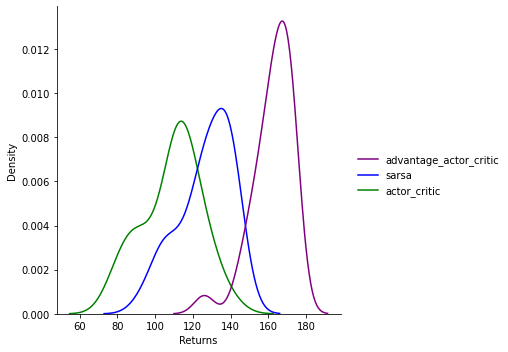

In [21]:
sns.displot(df, x = 1, kind = "kde", fill = False, hue = 0, palette=agent_colors)
plt.xlabel('Returns')


In [ ]:
plt.savefig('./plots/density.png', dpi = 300)
plt.savefig('./plots/density.pdf', dpi = 300)